### Exercici 2
-Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

->PRE-PROCESSING-DATA/movies.dat

In [31]:
import pandas as pd
import seaborn as sns


pelis = pd.read_table('/Users/angelssastrenadal/Downloads/ITAcademy_Exercicis/Sprint4/bdd M4 T02 Exercici 1/movies.dat', 
                      header = None, sep = "::", names= ['ID', 'Title', 'Genre_gral'], engine = 'python', encoding = "ISO-8859-1")
# li poso els separadors per columna, els noms de columna i el encoding de la bdd

pelis



,ID,Title,Genre_gral
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


Veig també que la columna Title inclou l'any de la película per tant separaré l'any amb el valor que hi ha entre parèntesi


 Extrec el Titol i l'any de la columna "Title" fent servir una expressió regular.
^ and $: es el començament i el final del texte de la columna.
(.*): Agafo tots els caracters fins el començament del parentesi 
\(: Es el començament del parentesi
(\d{4}): extrec un grup de 4 caracters (l'any).
\) el final del parentesi

In [32]:
pelis[['Title', 'Year']] = pelis['Title'].str.extract(r'^(.*)\((\d{4})\)$') 
#de la columna Title en faig 2, Title i creo una nova que es diu Year per poder treballar amb ella.
pelis

,ID,Title,Genre_gral,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


I check there are no nulls:

In [33]:
pelis.isnull().sum()

ID            0
Title         0
Genre_gral    0
Year          0
dtype: int64

He vist que a la bdd totes les pelicules tenen genere, (no hi ha Nulls) pero hi ha gairebé la meitat que en tenen 2 de generes, 
536 en tenen 3, 115 que en tenen 4, 15 que en tenen 5 i hi ha nomes 1 pelicula que te 6 generes...
Per tant converteixo el camp Genre_gral en un string separant-lo per "|"  i he utilizat el comandament "Explode" per 
assignar els diferents generes a la mateixsa pelicula que els hi correspon. 


In [34]:
pelis['Genre_gral'] = pelis['Genre_gral'].str.split('|') #el Comand explode pot asignar generes a una mateixa pelicula
pelisexploded = pelis.explode('Genre_gral').reset_index() #el Comand explode pot asignar diferents files a una mateixa pelicula
pelisexploded.head(20)

,index,ID,Title,Genre_gral,Year
0,0,1,Toy Story,Animation,1995
1,0,1,Toy Story,Children's,1995
2,0,1,Toy Story,Comedy,1995
3,1,2,Jumanji,Adventure,1995
4,1,2,Jumanji,Children's,1995
5,1,2,Jumanji,Fantasy,1995
6,2,3,Grumpier Old Men,Comedy,1995
7,2,3,Grumpier Old Men,Romance,1995
8,3,4,Waiting to Exhale,Comedy,1995
9,3,4,Waiting to Exhale,Drama,1995


- Mirem com son les variables i les dades estadístiques que en podem extreure:

In [35]:
pelisexploded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       6408 non-null   int64 
 1   ID          6408 non-null   int64 
 2   Title       6408 non-null   object
 3   Genre_gral  6408 non-null   object
 4   Year        6408 non-null   object
dtypes: int64(2), object(3)
memory usage: 250.4+ KB


-Per poder treballar-hi, modifico el tipus al titol de la pelicula i el gènere a categoria i l'any a int64.

In [133]:
tipus = {'Title':'category',
         'Genre_gral':'category', 'Year':'int64'}
pelisexploded.astype(tipus).dtypes

index            int64
ID               int64
Title         category
Genre_gral    category
Year             int64
dtype: object

- Miro si hi han pelis duplicades:

In [92]:
pelisexploded.loc[pelisexploded.duplicated()]

,index,ID,Title,Genre_gral,Year


In [99]:
pelisexploded.nunique()

index         3883
ID            3883
Title         3841
Genre_gral      18
Year            81
dtype: int64

- Veiem que hi ha alguns titols que es deuen repetir perque hi ha mes titols que index

In [102]:
Titles = pelisexploded.Title.value_counts() 
Titles 

Jungle Book, The                 7
Mummy, The                       7
King Kong                        6
That Darn Cat!                   6
Transformers: The Movie, The     6
                                ..
Hedd Wyn                         1
Collectionneuse, La              1
Kaspar Hauser                    1
Little Voice                     1
Eyes Wide Shut                   1
Name: Title, Length: 3841, dtype: int64

In [103]:
Genres = pelisexploded.Genre_gral.value_counts()
Genres

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
Name: Genre_gral, dtype: int64

In [93]:
pelisexploded.describe() #miro el resum estadístic de les variables numèriques.

,index,ID,Year
count,6408.000000,6408.000000,6408.000000
mean,1905.284644,1949.873283,1986.195225
std,1110.803190,1136.449312,16.516078
min,0.000000,1.000000,1919.000000
25%,965.750000,977.750000,1983.000000
50%,1893.500000,1962.500000,1994.000000
75%,2842.250000,2911.250000,1997.000000
max,3882.000000,3952.000000,2000.000000


Per index veig que es una base de dades de 3883 pelicules. 
Veig que les pelicules van del 1919 a l'any 2000 i que la majoria de pelicules al voltant del 1997, per tant
será una distribució de películes i generes per any molt cap a la dreta. 
L'any te una desviació standard molt petita, per tant la majoria d'anys s'acosten a la mitjana.
Dels 3883 registres 1803 son de genere Drama o Comedia seguit per Acció amb 503 i Thriller amb 492.



## Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció

In [39]:
#Miro quantes pelicules s'han fet per any
peliculesxany = pelisexploded.groupby('Year')['index'].size().reset_index(name='Nr_MoviesperYear').sort_values(by='Year', ascending=False)
#Agrupo per any i compto per index perque hi la mateixa pelicula amb dif generes
peliculesxany


,Year,Nr_MoviesperYear
80,2000,247
79,1999,431
78,1998,572
77,1997,540
76,1996,541
...,...,...
4,1923,3
3,1922,2
2,1921,1
1,1920,2


<AxesSubplot:ylabel='Year'>

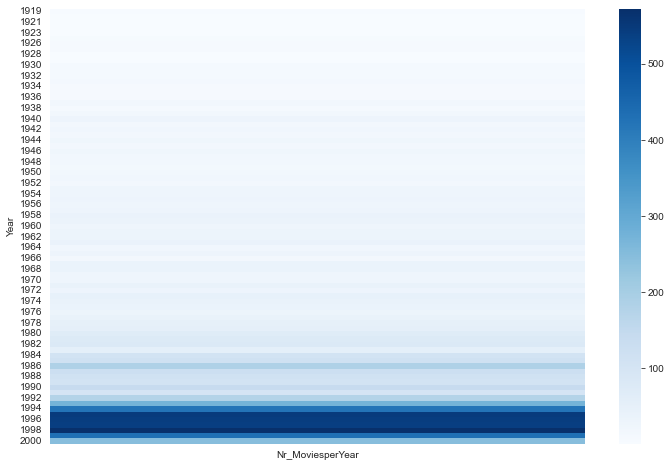

In [88]:
#Faig la visualització amb seaborn amb un heatmap
import seaborn as sns #Importo llibreries i baixo la bdd
fig, ax = plt.subplots(figsize=(12, 8)) #Incremento el tamany per veure amb mes claredat.
sns.set_style("whitegrid") #estil del gràfic amb fons blanc
sns.heatmap(peliculesxany.pivot_table(index='Year', values='Nr_MoviesperYear'), cmap="Blues") #Faig un grafic de mapa de calor/intensitat d'un 



- Veiem que es fan moltes mes pelicules per any a partir del 85 i en especial entre 1995 al 1998 quan es concentren mes pelicules.

- També crec que seria interessant veure quins generes han estat mes populars per any i com han evolucionat, per aixó intento fer un mapa de bombolles.


In [115]:
grouped = pelisexploded.groupby(['Genre_gral', 'Year']).size().reset_index(name='Total Movies').sort_values(by='Year', ascending=True)
#agrupo per genere i any, compto el nro de pelicules i creo una nova columna amb el total i la ordeno per any.

grouped.head(30)

,Genre_gral,Year,Total Movies
0,Action,1919,1
347,Drama,1919,2
52,Adventure,1919,1
204,Comedy,1919,1
205,Comedy,1920,2
1,Action,1921,1
477,Horror,1922,1
348,Drama,1922,1
206,Comedy,1923,2
349,Drama,1923,1


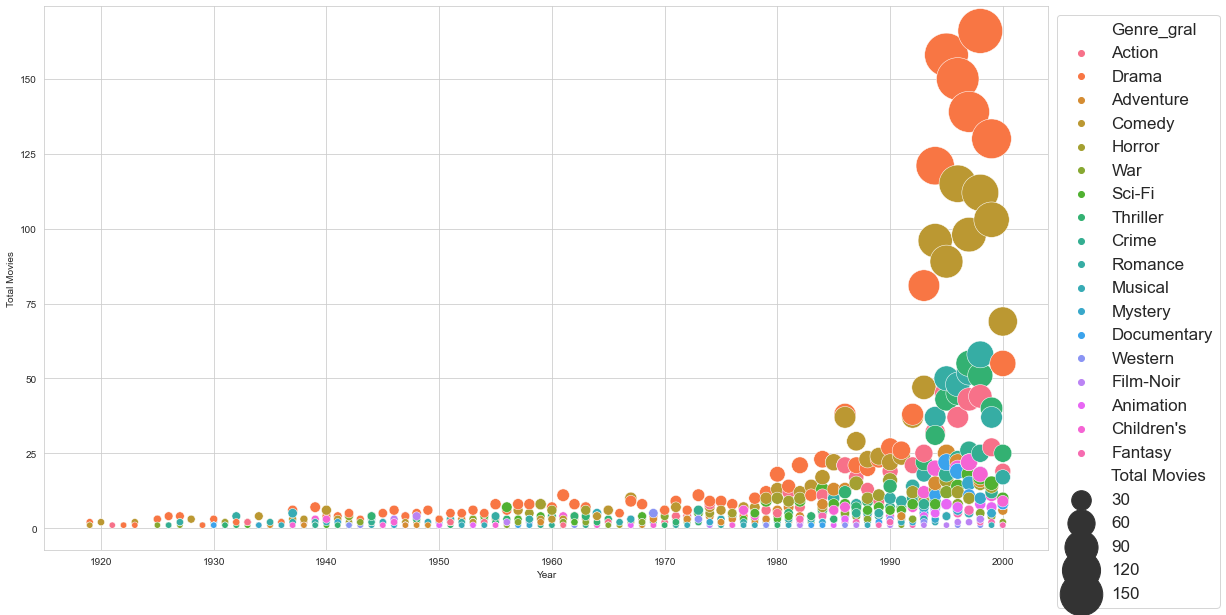

In [116]:
import matplotlib.pyplot as plt

# Posem el tamany del gràfic
plt.rcParams['figure.figsize'] = [18, 10]

# data 
data = grouped
 
# utilitzo el scatterplot i li poso llegenda i tamany de les bombolles
sns.scatterplot(data=data, x="Year", y="Total Movies", size="Total Movies", hue="Genre_gral", legend=True, sizes=(40, 2000))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=17) #localitzo la llegenda

plt.show()

- Veiem aqui que es una distribució molt cap a la dreta on el gènere amb mes pelicules destaca que es de de Drama i el de Comedia,seguit per 
Acció i Thriller. Veiem també que hi ha un creixement exponencial amb nombre de pelicules a partir de mitjans dels 90.


- Faig un nou grup per Any i total de pelicules per génere.

- Una dada que trobo seria interessant seria veure quin genere ha estat el mes Popular cada any...


In [131]:

generemespopular = grouped.groupby('Year')['Total Movies'].idxmax()
#Trobo el maxim valor en la serie de Total Movies agrupada per any

#I trobo el genere mes popular 
Generemespopularxany = grouped.loc[generemespopular]
Generemespopularxany.head(70)


,Genre_gral,Year,Total Movies
347,Drama,1919,2
205,Comedy,1920,2
1,Action,1921,1
477,Horror,1922,1
206,Comedy,1923,2
...,...,...,...
408,Drama,1985,22
409,Drama,1986,38
264,Comedy,1987,29
265,Comedy,1988,23


In [127]:
Generemespopularxany.info()#miro de nou les variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 347 to 277
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Genre_gral    81 non-null     object
 1   Year          81 non-null     Int64 
 2   Total Movies  81 non-null     int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 2.6+ KB


In [ ]:
- Faig un gràfic aquest cop amb plotly.express 

In [126]:
import plotly
import plotly.express as px
fig = px.scatter(Generemespopularxany, x="Year", y="Total Movies", size="Total Movies", color="Genre_gral",hover_name="Total Movies",log_x=True, size_max=50)
#Eix x l'any, eix vertical el nombre de titols/films aixi com el tamany dels cercles és el nombre de pelicules i el (hover) et dona les dades per genere.
fig.show()

Podem veure que el genere de Drama potser es el mes popular durant els anys. Entre el 34 i el 36 i entre el 87 i el 89 va ser la comedia.
Però en general veiem que els generes mes populars son o bé Drama en blau fosc o Comedy en vermell, i que a partir dels 80 es també quan es fan mes films. El 1998 es quan es van fer mes pelicules de Drama 166 en total.

- Com al pujar aquest notebook a Github no es veuen els gràfics amb Plotly Express, pujo el gràfic en png i el notebook amb html.